<a href="https://colab.research.google.com/github/RenanSoaresMP/Pandas-IO/blob/main/Pandas_IO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Importando arquivos no formato JSON

In [ ]:
mulheres = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=500&sexo=f")
homens = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=500&sexo=m")

In [ ]:
mulheres.sample(5)

,nome,regiao,freq,rank,sexo
311,GRAZIELE,0,46991,312,F
431,EMILE,0,31053,432,F
43,TEREZINHA,0,298311,44,F
69,TEREZA,0,219219,70,F
295,LUCIMARA,0,49699,296,F


In [ ]:
type(mulheres)

pandas.core.frame.DataFrame

In [ ]:
print('Quantidade de nomes: '+ str(len(mulheres) + len(homens)))

Quantidade de nomes: 1000


In [ ]:
homens_e_mulheres = [mulheres , homens]

In [ ]:
type(homens_e_mulheres)

list

In [ ]:
nomes = pd.concat(homens_e_mulheres)['nome'].to_frame()
nomes.sample(5)

,nome
149,ISRAEL
320,ADRIANE
277,LINDOMAR
8,PATRICIA
365,JARDEL


# Incluindo ID dos alunos

In [ ]:
import numpy as np
np.random.seed(123)

In [ ]:
total_alunos = len(nomes)
total_alunos

1000

In [ ]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [ ]:
nomes.sample(5)

,nome,id_aluno
197,LUCIANE,658
43,TEREZINHA,311
193,KAUAN,219
276,ANDREI,635
46,FABIANA,339


In [ ]:
dominios = ['@gmail.com', '@yahoo.com.br']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [ ]:
nomes.sample(4)

,nome,id_aluno,dominio
278,JHONATAN,460,@gmail.com
229,VALDOMIRO,628,@yahoo.com.br
376,MEIRE,22,@yahoo.com.br
61,BIANCA,537,@gmail.com


In [ ]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email
222,JUSSARA,271,@gmail.com,jussara@gmail.com
195,WALTER,495,@yahoo.com.br,walter@yahoo.com.br
50,RAFAELA,162,@yahoo.com.br,rafaela@yahoo.com.br


# Criando a tabela Cursos e lendo HTML

In [ ]:
!pip3 install html5lib
!pip3 install lxml

In [ ]:
import html5lib

In [ ]:
url ="http://tabela-cursos.herokuapp.com/index.html"
pd.read_html(url)

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
cursos = pd.read_html(url)

In [ ]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
type(cursos)

list

In [ ]:
cursos = cursos[0]

In [ ]:
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index do dataframe cursos

In [ ]:
cursos.rename(columns= {'Nome do curso' : 'nome_do_curso'})

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [ ]:
cursos = cursos.rename(columns= {'Nome do curso' : 'nome_do_curso'})

In [ ]:
cursos['id'] = cursos.index + 1

In [ ]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [ ]:
cursos = cursos.set_index('id')

In [ ]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
48,RENATO,303,@gmail.com,renato@gmail.com
79,VALDIR,192,@yahoo.com.br,valdir@yahoo.com.br
118,SANDRO,564,@yahoo.com.br,sandro@yahoo.com.br
101,SILVIO,415,@gmail.com,silvio@gmail.com
227,CASSIA,755,@yahoo.com.br,cassia@yahoo.com.br


# Matriculando os alunos nos cursos

In [ ]:
nomes['matriculas'] = np.random.exponential(size=total_alunos).astype(int)

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
373,EMANUELE,606,@gmail.com,emanuele@gmail.com,0
187,ELTON,941,@gmail.com,elton@gmail.com,3
308,AMARILDO,258,@gmail.com,amarildo@gmail.com,1
401,MAGDA,176,@gmail.com,magda@gmail.com,0
223,IZABEL,709,@gmail.com,izabel@gmail.com,0


In [ ]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)).astype(int)

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
102,HELIO,289,@gmail.com,helio@gmail.com,1
152,LARA,670,@gmail.com,lara@gmail.com,1
462,OLAVO,997,@gmail.com,olavo@gmail.com,1
36,ROBERTO,106,@gmail.com,roberto@gmail.com,1
388,NATALI,128,@gmail.com,natali@gmail.com,3


In [ ]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
171,VALDEMIR,964,@yahoo.com.br,valdemir@yahoo.com.br,1
433,RAI,791,@gmail.com,rai@gmail.com,3
286,RUI,687,@yahoo.com.br,rui@yahoo.com.br,2
1,JOAO,849,@yahoo.com.br,joao@yahoo.com.br,1
9,ALINE,480,@yahoo.com.br,aline@yahoo.com.br,1


In [ ]:
nomes.matriculas.describe()

count    1000.000000
mean        2.020000
std         1.405552
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: matriculas, dtype: float64

# Gerando um histograma

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


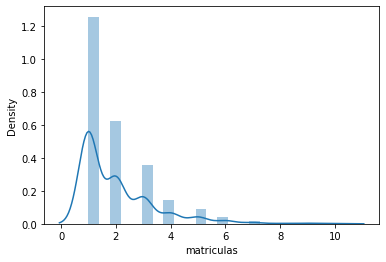

In [ ]:
sns.distplot(nomes.matriculas)

In [ ]:
nomes.matriculas.value_counts()

1     492
2     245
3     140
4      56
5      36
6      17
7       7
9       3
8       2
10      2
Name: matriculas, dtype: int64

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
385,MARINES,426,@gmail.com,marines@gmail.com,4
229,VALDOMIRO,628,@yahoo.com.br,valdomiro@yahoo.com.br,3
328,SILVANIA,120,@gmail.com,silvania@gmail.com,3
215,CLARICE,530,@yahoo.com.br,clarice@yahoo.com.br,4
406,MARIVALDO,306,@yahoo.com.br,marivaldo@yahoo.com.br,4


# Selecionando cursos

In [ ]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [ ]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]

In [ ]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

In [ ]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head(5)

,id_aluno,id_curso
0,132,19
1,204,3
2,204,2
3,51,10
4,51,19


In [ ]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso'])

,id_aluno,nome_do_curso
id_curso,,
1,17,Lógica de programação
2,355,Java para Web
3,427,C# para Web
4,261,Ruby on Rails
5,244,Cursos de Python
6,143,PHP com MySql
7,62,.NET para web
8,43,Novas integrações com Java
9,47,TDD com Java


In [ ]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,17,Lógica de programação
2,355,Java para Web
3,427,C# para Web
4,261,Ruby on Rails
5,244,Cursos de Python
6,143,PHP com MySql
7,62,.NET para web
8,43,Novas integrações com Java
9,47,TDD com Java


In [ ]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

# Saída em diferentes formatos

In [ ]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,17,Lógica de programação
2,355,Java para Web
3,427,C# para Web


# Exportando o dataframe para o formato CSV

In [ ]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False) #index = False, para que o index não seja exportado

In [ ]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,17,Lógica de programação
1,355,Java para Web
2,427,C# para Web
3,261,Ruby on Rails
4,244,Cursos de Python
5,143,PHP com MySql
6,62,.NET para web
7,43,Novas integrações com Java
8,47,TDD com Java
9,153,Código limpo com C#


# Exportando o dataframe para o formato JSON

In [ ]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"1":17,"2":355,"3":427,"4":261,"5":244,"6":143,"7":62,"8":43,"9":47,"10":153,"11":165,"12":208,"13":74,"14":275,"15":114,"16":379,"17":144,"18":75,"19":455,"20":399},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

# Exportando o dataframe para o formato html

In [ ]:
matriculas_html = matriculas_por_curso.to_html()
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>17</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>355</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>427</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>261</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>244</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>143</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>62</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>43</td>\n      <td>Novas integrações com Java</

# Criando o banco SQL

In [ ]:
!pip3 install sqlalchemy

In [ ]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

In [ ]:
engine = create_engine('sqlite:///:memory:')
engine

Engine(sqlite:///:memory:)

In [ ]:
type(engine)

sqlalchemy.engine.base.Engine

In [ ]:
matriculas_por_curso.to_sql('matriculas', engine)

In [ ]:
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspector

['matriculas']


In [ ]:
query = 'select * from matriculas where quantidade_de_alunos < 100'

In [ ]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,17,Lógica de programação
1,7,62,.NET para web
2,8,43,Novas integrações com Java
3,9,47,TDD com Java
4,13,74,Persistência com .NET
5,18,75,Programação funcional


In [ ]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,17
1,Java para Web,355
2,C# para Web,427
3,Ruby on Rails,261
4,Cursos de Python,244
5,PHP com MySql,143
6,.NET para web,62
7,Novas integrações com Java,43
8,TDD com Java,47
9,Código limpo com C#,153


In [ ]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
muitas_matriculas.query('quantidade_de_alunos > 150')

,nome_do_curso,quantidade_de_alunos
1,Java para Web,355
2,C# para Web,427
3,Ruby on Rails,261
4,Cursos de Python,244
9,Código limpo com C#,153
10,Preparatório para certificação Java,165
11,Hardware básico,208
13,Desenvolvendo jogos,275
15,Estatística básica,379
18,Boas práticas em Java,455


In [ ]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 150')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
1,Java para Web,355
2,C# para Web,427
3,Ruby on Rails,261
4,Cursos de Python,244
9,Código limpo com C#,153
10,Preparatório para certificação Java,165
11,Hardware básico,208
13,Desenvolvendo jogos,275
15,Estatística básica,379
18,Boas práticas em Java,455


# Escrevendo no banco

In [ ]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [ ]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Nomes dos alunos e alunas da próxima turma

In [ ]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,17,Lógica de programação
2,355,Java para Web
3,427,C# para Web
4,261,Ruby on Rails
5,244,Cursos de Python


In [ ]:
matriculas.head()

,id_aluno,id_curso
0,132,19
1,204,3
2,204,2
3,51,10
4,51,19


In [ ]:
id_curso = 16
proxima_turma = matriculas.query(f"id_curso == {id_curso}")

In [ ]:
proxima_turma.head()

,id_aluno,id_curso
41,373,16
42,300,16
47,595,16
49,737,16
60,567,16


In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
325,ELISEU,9,@yahoo.com.br,eliseu@yahoo.com.br,4
84,FATIMA,714,@yahoo.com.br,fatima@yahoo.com.br,5
496,CLAUDIANE,409,@gmail.com,claudiane@gmail.com,1


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
4         MACIEL
6         ROSANA
16      IVANILDE
27         RAISA
28         MAURO
          ...   
992       MARCIO
995      BARBARA
997        OLAVO
997        OLAVO
1000    DENILSON
Name: nome, Length: 379, dtype: object

In [ ]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [ ]:
proxima_turma.head()

,nome
id_aluno,
4,MACIEL
6,ROSANA
16,IVANILDE
27,RAISA
28,MAURO


In [ ]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [ ]:
curso_escolhido = cursos.loc[id_curso]
curso_escolhido

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [ ]:
curso_escolhido = curso_escolhido.nome_do_curso
curso_escolhido

'Estatística básica'

In [ ]:
proxima_turma.head()

,nome
id_aluno,
4,MACIEL
6,ROSANA
16,IVANILDE
27,RAISA
28,MAURO


In [ ]:
proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(curso_escolhido)})

,Alunos do curso de Estatística básica
id_aluno,
4,MACIEL
6,ROSANA
16,IVANILDE
27,RAISA
28,MAURO
...,...
992,MARCIO
995,BARBARA
997,OLAVO


# Escrevendo e lendo em excel

In [ ]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [ ]:
pd.read_excel('proxima_turma.xlsx')

,nome
0,MACIEL
1,ROSANA
2,IVANILDE
3,RAISA
4,MAURO
...,...
374,MARCIO
375,BARBARA
376,OLAVO
377,OLAVO
